##Classifiers used:
* Linear SVM
* Logistic Regression
* Random Forest
* AdaBoost
* Gradient Boosting
* KNN
* MLP

###Imports

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

###Loading data

In [0]:
X = np.loadtxt("/content/gdrive/My Drive/MCA_Project/tweet_vecs.txt", delimiter=',')
Y = np.loadtxt("/content/gdrive/My Drive/MCA_Project/tweet_label.txt", delimiter=',')
Y_onehot = np.loadtxt("/content/gdrive/My Drive/MCA_Project/tweet_label_onehot.txt", delimiter=',')

###Dimensionality reduction of raw data

In [0]:
X_2d = TSNE(n_components=2).fit_transform(X)

###Saving the raw data of reduced dimension to a pickle file
(so that we don't have to run tsne again)

In [0]:
with open("/content/gdrive/My Drive/MCA_Project/X_raw_2d", "w+b") as file:
  pickle.dump(X_2d, file)

###Visualizing raw data

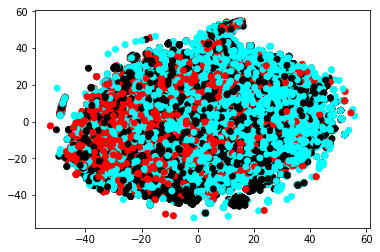

In [81]:
with open("/content/gdrive/My Drive/MCA_Project/X_raw_2d", "rb") as file:
  X_2d = pickle.load(file)
colors = ['red', 'green', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black']
plt.scatter(X_2d[:,0], X_2d[:,1], c=Y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


###Data Standardization
(mean of zero and a standard deviation of one (unit variance))

In [0]:
X_std = preprocessing.scale(X)

###Dimensionality reduction of sandardize data

In [0]:
X_std_2d = TSNE(n_components=2).fit_transform(X_std)

###Saving the sandardized data of reduced dimension to a pickle file
(so that we don't have to run tsne again

In [0]:
with open("/content/gdrive/My Drive/MCA_Project/X_std_2d", "w+b") as file:
  pickle.dump(X_std_2d, file)

###Visualizing sandardized data

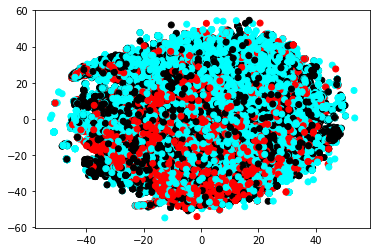

In [85]:
colors = ['red', 'green', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black']
plt.scatter(X_std_2d[:,0], X_std_2d[:,1], c=Y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

###Test-train split
(80% train, 20% test)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.20, random_state=42)

###SVM

In [49]:
clf_svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-2, max_iter=5, random_state=42)
clf_svm.fit(X_train, Y_train)
predictions_svm = clf_svm.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/svm.model", "w+b") as file:
    pickle.dump(clf, file)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [50]:
svm_accuracy = accuracy_score(Y_test, predictions_svm)
print("SVM_accuracy:",svm_accuracy)

SVM_accuracy: 0.5941886455073759


###Grid Search

In [0]:
#parameters = {'clf_alpha': (1e-2, 1e-3)}

###Logistic Regerssion

In [0]:
clf_log_reg = LogisticRegression(solver='sag', max_iter=1000, multi_class='multinomial')
clf_log_reg.fit(X_train, Y_train)
predictions_log_reg = clf_log_reg.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/logistic_regression.model", "w+b") as file:
    pickle.dump(clf_log_reg, file)

In [52]:
log_reg_accuracy = accuracy_score(Y_test, predictions_log_reg)
print("log_reg_accuracy:", log_reg_accuracy)

log_reg_accuracy: 0.5990165400089406


###MLP classifier

In [0]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='identity', random_state=1)
clf_mlp.fit(X_train, Y_train)
predictions_mlp = clf_mlp.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/mlp.model", "w+b") as file:
    pickle.dump(clf_mlp, file)

In [78]:
mlp_accuracy = accuracy_score(Y_test, predictions_mlp)
print("mlp_accuracy:", mlp_accuracy)

mlp_accuracy: 0.5998211890925347


###Random Forest

In [0]:
clf_rnd_forest = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf_rnd_forest.fit(X_train, Y_train)
predictions_rnd_forest = clf_rnd_forest.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/random_forest.model", "w+b") as file:
    pickle.dump(clf_rnd_forest, file)

In [60]:
rnd_forest_accuracy = accuracy_score(Y_test, predictions_rnd_forest)
print("random_forest_accuracy:", rnd_forest_accuracy)

random_forest_accuracy: 0.5662047384890478


###AdaBoost

In [0]:
clf_adaboost = AdaBoostClassifier(n_estimators=100)
clf_adaboost.fit(X_train, Y_train)
predictions_adaboost = clf_adaboost.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/adaboost.model", "w+b") as file:
    pickle.dump(clf_adaboost, file)

In [62]:
adaboost_accuracy = accuracy_score(Y_test, predictions_adaboost)
print("adaboost_accuracy:", adaboost_accuracy)

adaboost_accuracy: 0.5561913276709879


###Gradient Boosting model

In [0]:
clf_gradient_boost = GradientBoostingClassifier(n_estimators=100)
clf_gradient_boost.fit(X_train, Y_train)
predictions_gradient_boost = clf_gradient_boost.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/gradient_boost.model", "w+b") as file:
    pickle.dump(clf_gradient_boost, file)

In [80]:
gradient_boost_accuracy = accuracy_score(Y_test, predictions_gradient_boost)
print("gradient_boost_accuracy:", gradient_boost_accuracy)

gradient_boost_accuracy: 0.5842646401430487


###KNN

In [0]:
clf_KNN = KNeighborsClassifier(n_neighbors=10)
clf_KNN.fit(X_train, Y_train)
predictions_KNN = clf_KNN.predict(X_test)

with open("/content/gdrive/My Drive/MCA_Project/knn.model", "w+b") as file:
    pickle.dump(clf_KNN, file)

In [89]:
KNN_accuracy = accuracy_score(Y_test, predictions_KNN)
print("KNN_accuracy:", KNN_accuracy)

KNN_accuracy: 0.5501117568171658
